In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import glob
import time

from scipy.stats import mannwhitneyu 

In [2]:
### Graphics parameters:
# ----------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
#           'figure.figsize': (13*0.65,6.5*0.75),
            'axes.titlepad': 10}
plt.rcParams.update(params)

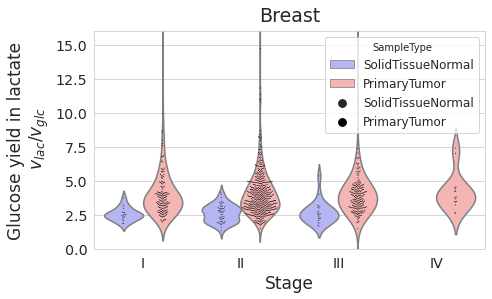

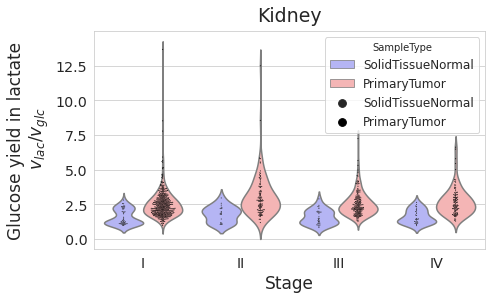

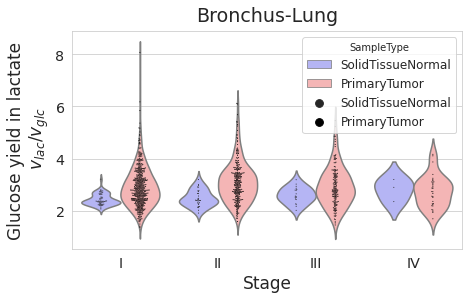

In [3]:
### Figure 5:
# -----------
files = ['Breast_fluxes.csv', 'Kidney_fluxes.csv', 'Bronchus-Lung_fluxes.csv']

for i, file in enumerate(files):
    sampleTypes, stages, lactateFluxes=[],[],[]
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        stage = sample.split("_")[1]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # stage
            if stage=='StageI' or stage=='StageIA' or stage=='StageIB':
                stages.append("I")
            elif stage=='StageII' or stage=='StageIIA' or stage=='StageIIB':
                stages.append("II")
            elif stage=='StageIII' or stage=='StageIIIA' or stage=='StageIIIB' or stage=='StageIIIC':
                stages.append("III")
            elif stage=='StageIV':
                stages.append("IV")
            elif stage=='StageNA':
                stages.append('NN')
            else: # 'StageX'
                stages.append('NN')
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
    
    # dataframe
    df = pd.DataFrame( data = {"SampleType": sampleTypes, 'Stage': stages, 'LactateFlux': lactateFluxes })
    
    # graphic
    order=["I","II","III","IV"]
    sns.set_style("whitegrid")
    tips = sns.load_dataset("tips")
    palette = sns.color_palette('bwr',n_colors=2,desat=1)
    plt.figure(figsize=(7,4))
    ax = sns.swarmplot(x='Stage',
                       y="LactateFlux",
                       hue="SampleType",
                       hue_order=["SolidTissueNormal","PrimaryTumor"],
                       dodge=True,
                       data=df,
                       size=1,
                       color='black',
                       order=order).set_title('Warburg effect')
    #violinplot
    ax = sns.violinplot(x='Stage',
                        y="LactateFlux",
                        hue="SampleType",
                        hue_order=["SolidTissueNormal","PrimaryTumor"],
                        scale='width', # width or area
                        scale_hue=True,
                        gridsize=1000,
                        dodge=True,
                        inner=None,
                        linewidth=1.5,
                        data=df,
                        palette=palette,
                        order=order).set_title(file.split("_")[0])
    if file.split("_")[0] == 'Breast':
        plt.ylim(0,16)
    plt.ylabel("Glucose yield in lactate\n $v_{lac}/v_{glc}$")
    plt.savefig('warburgeffect_'+str(i)+'.svg', bbox_inches="tight") #save fig
    plt.show()

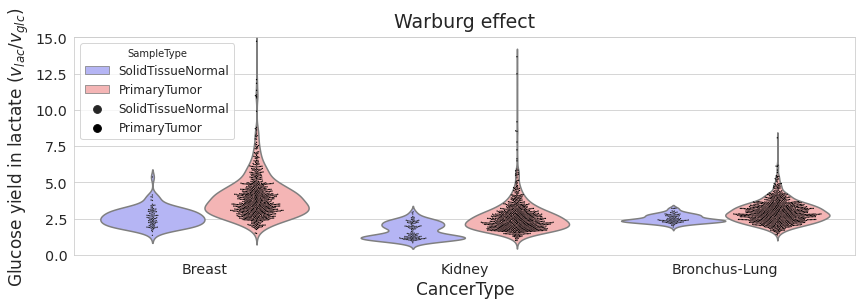

In [4]:
### Figure 4:
# -----------
files = ['Breast_fluxes.csv', 'Kidney_fluxes.csv', 'Bronchus-Lung_fluxes.csv']
sampleTypes, cancerTypes, lactateFluxes=[],[],[]
for file in files:
    allfluxes = pd.read_csv(file, sep='\t', lineterminator='\n').set_index("Reaction")
    # data
    for sample in allfluxes.columns:
        sampleType = sample.split("_")[0]
        
        if sampleType in ["SolidTissueNormal","PrimaryTumor"]:
            # sample type
            sampleTypes.append(sampleType)
            # cancer type
            cancerType = file.split("_")[0]
            cancerTypes.append(cancerType)
            # glucose yield in lactate
            beta = abs(1/allfluxes[sample].loc["R_EX_glc__D_e"])
            lactateFlux = allfluxes[sample].loc['R_EX_lac__L_e']*beta
            lactateFluxes.append(lactateFlux)
            
# dataframe
df = pd.DataFrame( data = {'SampleType': sampleTypes,
                           'CancerType': cancerTypes,
                           'LactateFlux': lactateFluxes })
# delete outliers
indices = np.array( df[df['LactateFlux'] > 15].index )
df = df.drop(indices)

# graphic
order=['Breast', 'Kidney', 'Bronchus-Lung']
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
palette = sns.color_palette('bwr',n_colors=2,desat=1)
plt.figure(figsize=(14,4))

ax = sns.swarmplot(x='CancerType',
                   y="LactateFlux",
                   hue="SampleType",
                   hue_order=["SolidTissueNormal","PrimaryTumor"],
                   dodge=True,
                   data=df,
                   size=1.3,
                   color='black',
                   order=order).set_title('Warburg effect')
#violinplot
ax = sns.violinplot(x='CancerType',
                    y="LactateFlux",
                    hue="SampleType",
                    hue_order=["SolidTissueNormal","PrimaryTumor"],
                    scale='width', # width or area
                    scale_hue=True,
                    gridsize=1000,
                    dodge=True,
                    inner=None,
                    linewidth=1.5,
                    data=df,
                    palette=palette,
                    order=order).set_title('Warburg effect')
plt.ylim(0,15)
plt.ylabel("Glucose yield in lactate ($v_{lac}/v_{glc}$)")
# plt.savefig('warburgeffect.svg', bbox_inches="tight") #save fig

plt.show()